## Regresión en plano N-dimensional (con ruido)

Este experimento consiste en generar puntos en un espacio de dimensión **N** que siguen aproximadamente un plano.
A estos puntos se les añade **ruido**, por lo que la red neuronal debe aprender a **predecir el valor objetivo** incluso cuando los datos están perturbados.

La relación aproximada que se intenta aprender es:

$$
y \approx \mathbf{w}^\top \mathbf{x} + b + \varepsilon
$$

donde

$$
\varepsilon
$$

representa el ruido añadido.


---

### Ejemplo implementado
- Número de muestras: **1000**
- Dimensión del espacio: **15**
- Nivel de ruido: **30%**

> Si se modifican estos valores (dimensión, muestras o ruido), es probable que sea necesario reajustar los hiperparámetros.

---

### Hiperparámetros utilizados

| Parámetro | Valor |
|---------|-------|
| **Optimizador** | RMSProp |
| **Tasa de aprendizaje** | 0.001 |
| **Épocas** | 300 |
| **Función de activación** | Sigmoid |
| **Nº de capas** | 3 |
| **Neuronas por capa** | 15 (o *n* características) → 10 → 8 → 1 |

---


In [14]:
import os, random
import numpy as np
import matplotlib.pyplot as plt


In [15]:
from main.neural_network.neural_network import train, predict, create_nn, test_loss
from main.neural_network.utils.draw_nn import draw_nn
from main.neural_network.layers.activation.functions import Tanh, Sigmoid, LeakyRelu
from main.neural_network.losses.mse import MSELoss
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.adam import Adam
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.utils.graphics.regression import dispersion_graph, learning_curve, noisy_plane_points


In [16]:

SEED = 78
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)


In [17]:
n_points = 200
n_dimensions = 3
noise_level = 0.9

X_train, X_test, Y_train, Y_test, w, b = noisy_plane_points(n_points, n_dimensions, noise_level)

X = X_train
Y = Y_train.ravel()

c_eff = float(w[2] * X[:, 2, 0].mean() + b)
coefficients = np.array([w[0], w[1], c_eff])

In [18]:
n_points = 200
n_dimensions = 3
noise_level = 0.9

X_train, X_test, Y_train, Y_test, w, b = noisy_plane_points(n_points, n_dimensions, noise_level)

X = X_train
Y = Y_train.ravel()  

c_eff = float(w[2] * X[:, 2, 0].mean() + b)
coefficients = np.array([w[0], w[1], c_eff])

%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x1 = X[:, 0, 0]
x2 = X[:, 1, 0]
ax.scatter(x1, x2, Y, c='blue', marker='o', label='Puntos de entrenamiento')

x1_range = np.linspace(x1.min(), x1.max(), 20)
x2_range = np.linspace(x2.min(), x2.max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
z_plane = coefficients[0] * x1_grid + coefficients[1] * x2_grid + coefficients[2]

ax.plot_surface(x1_grid, x2_grid, z_plane, alpha=0.5, color='orange', label='Plano')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Puntos de entrenamiento y plano ajustado')
ax.legend()

plt.show()
%matplotlib inline

<IPython.core.display.Javascript object>

In [19]:
n_points = 1500
n_dimensions = 15
noise_level = 0.9

X_train, X_test, Y_train, Y_test, w, b = noisy_plane_points(n_points, n_dimensions, noise_level)

<IPython.core.display.Javascript object>

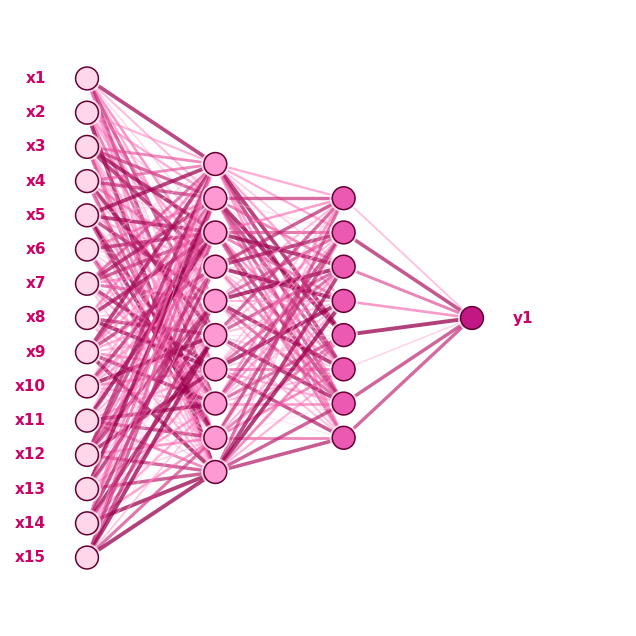

In [20]:
optimizers = [
    RMSProp(learning_rate=0.001),
    RMSProp(learning_rate=0.001),
    RMSProp(learning_rate=0.001)
]

activations = [Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([15, 10, 8, 1], activation_function=activations, optimizers=optimizers)
draw_nn(nn)

In [21]:
train_loss = train(nn, loss, X_train, Y_train, epochs=300)

In [22]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 26.242126918813586


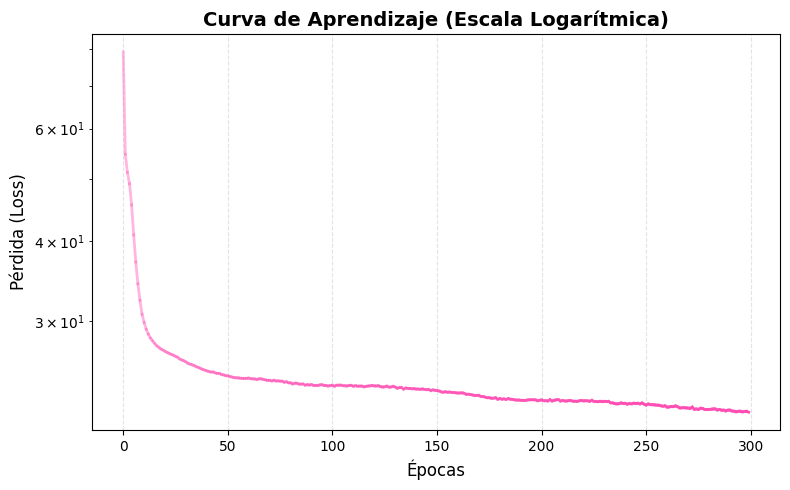

In [23]:
learning_curve(train_loss)

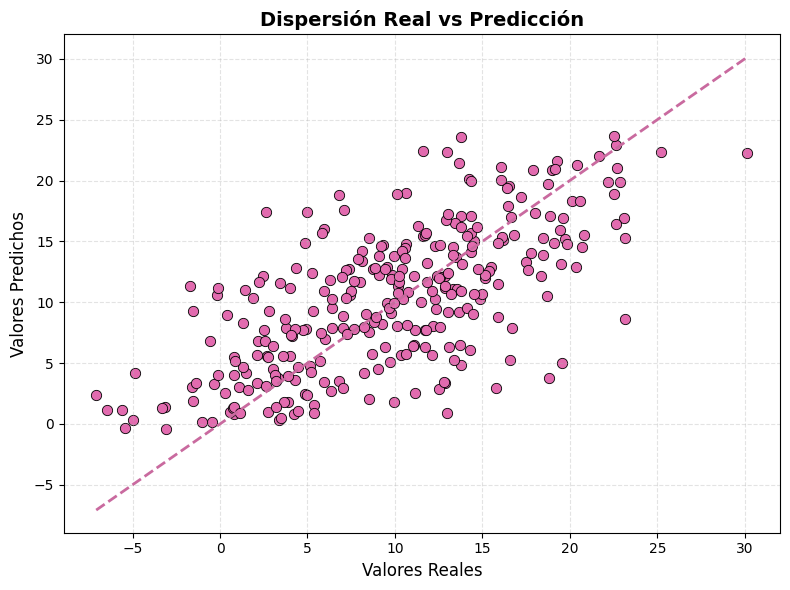

In [24]:
y_pred = []
for X, y in zip(X_test, Y_test):
    output = predict(nn, X)
    y_pred.append(output[0][0])

dispersion_graph(Y_test, y_pred)

# Experimentos

### Primer test

In [25]:
optimizers = [
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001),
    Adam(learning_rate=0.001)
]

activations = [Sigmoid(), Sigmoid()]

loss = MSELoss()

nn = create_nn([15, 15, 16, 1], activation_function=activations, optimizers=optimizers)

train_loss = train(nn, loss, X_train, Y_train, epochs=300)

In [26]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 29.76509069325581


### Segundo test

In [27]:
optimizers = [
    RMSProp(learning_rate=0.005),
    RMSProp(learning_rate=0.005)
]

activations = [Tanh()]

loss = MSELoss()

nn = create_nn([15, 6, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

In [28]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 26.74411582618399


### Tercer test

In [29]:
optimizers = [
    SGD(learning_rate=0.01),
    SGD(learning_rate=0.01),
    SGD(learning_rate=0.01)
]

activations = [LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([15, 20, 2, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

In [30]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 8.00201949321378e+62


### Cuarto test

In [31]:
optimizers = [
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002),
    Momentum(learning_rate=0.002)
]

activations = [LeakyRelu(), LeakyRelu()]

loss = MSELoss()

nn = create_nn([15, 5, 3, 1], activation_function=activations, optimizers=optimizers)


_ = train(nn, loss, X_train, Y_train, epochs=300)

In [32]:
_ = test_loss(nn, loss, X_test, Y_test)

Loss in test = 68.52497098417888
